# DS-SF-38 | Unit Project | 2 | Exploratory Data Analysis | Answer Key

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [2]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [3]:
df.shape

(400, 4)

Answer: 400.

> ### Question 2.  Create a summary table.

In [4]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [5]:
df.var()

admit           0.217237
gre         13369.953040
gpa             0.144879
prestige        0.893654
dtype: float64

Answer: Because it has a much larger range.

> ### Question 4.  Drop data points with missing data.

In [6]:
df.dropna(inplace = True)

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [7]:
df.shape

(397, 4)

Answer: We went from 400 samples down to 397.

> ### Question 6.  Create boxplots for `gre` and `gpa`.

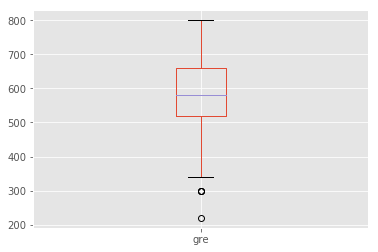

In [8]:
df.gre.plot(kind = 'box')

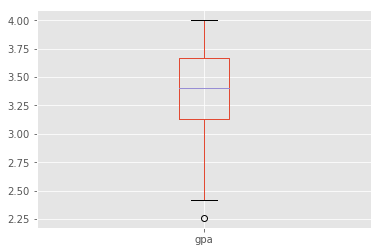

In [9]:
df.gpa.plot(kind = 'box')

> ### Question 7.  What do boxplots show?

Answer:

- Range: from Q0 (minimum) to Q4 (maximum)
- Interquartile range: or the middle 50%; from Q1 (25th percentile) to Q3 (75th percentile)
- Median: or Q2 (50th percentile)
- Outliers

> ### Question 8.  Plot the distribution of each variable.

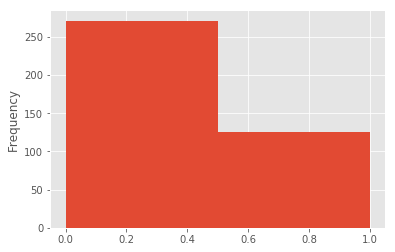

In [10]:
df.admit.plot(kind = 'hist', range = (0, 1), bins = 2)

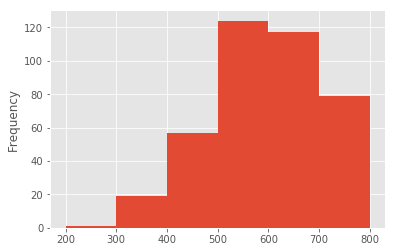

In [11]:
df.gre.plot(kind = 'hist', range = (200, 800), bins = 6)

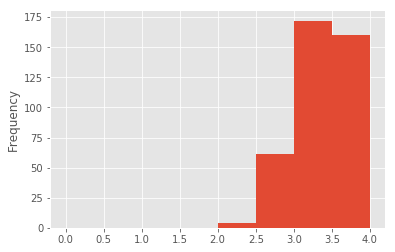

In [12]:
df.gpa.plot(kind = 'hist', range = (0, 4), bins = 8)

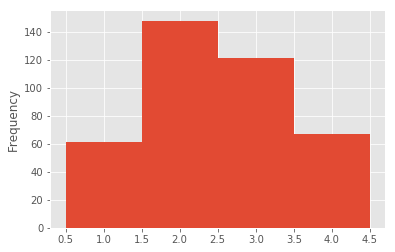

In [13]:
df.prestige.plot(kind = 'hist', range = (.5, 4.5), bins = 4)

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

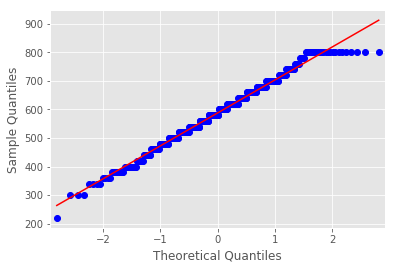

In [14]:
sm.qqplot(df.gre, line = 's')

pass

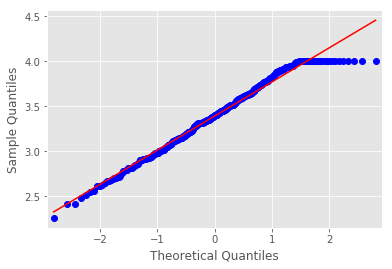

In [15]:
sm.qqplot(df.gpa, line = 's')

pass

Answer: The q-q plots show that `gre` and `gpa` are fairly well normally distributed and don't need correction.

> ### Question 10.  Create a correlation matrix for the dataset.

In [16]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: Colinearity is not a concern here.

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer:

1. Do a crude analysis with the following model: `P(admit = 1) = alpha + beta(prestige)`
2. Repeat controlling for `gre` and `gpa`

> ### Question 13.  What is your hypothesis?

Answer: Students who attended a more prestigious undergraduate institution are more likely to be admitted to a graduate school.